<a href="https://colab.research.google.com/github/abel-salazar/CienciaDatosPython/blob/main/Proyecto_N%C2%B0_04_Ciencia_Datos_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

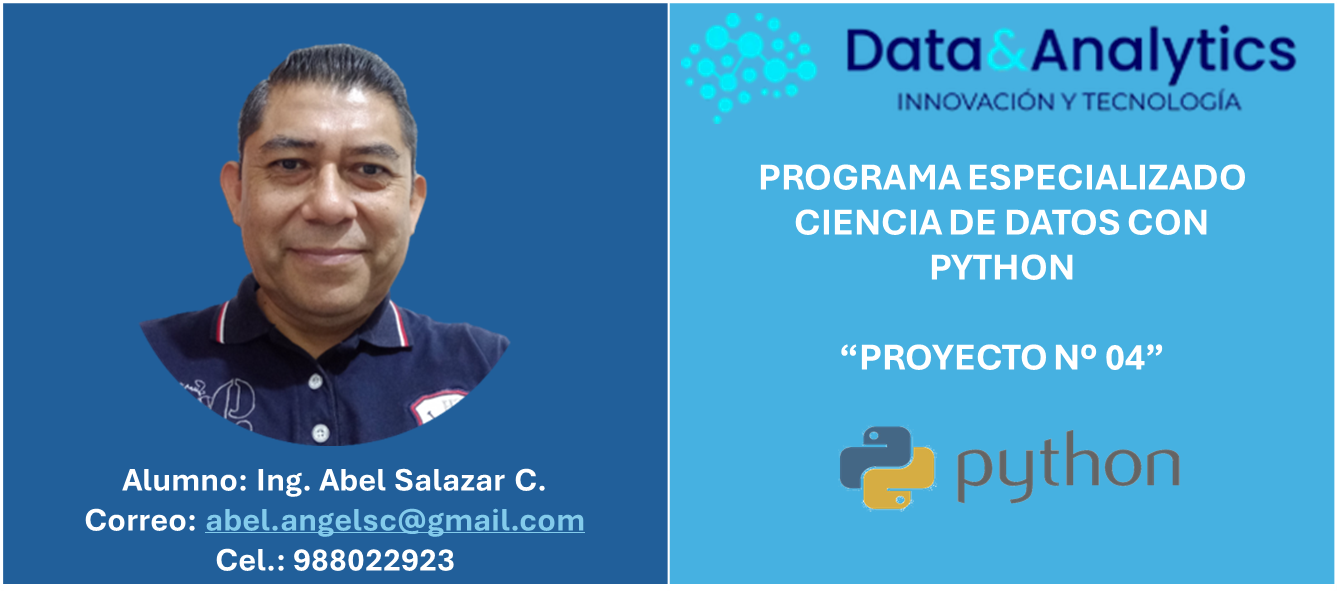

# **CASO: SINIESTROS SEGUROS**

**RETO:**

Se tiene un conjunto de datos simulado basado en seis meses de la información recogida por una aseguradora mundial llamada “SALUD Y SEGUROS”, cuyo objetivo fue desarrollar un modelo para determinar la probabilidad de siniestro en los próximos 12 meses.

La variable de interés es la siniestralidad , que representa el estado binario de No Siniestro 0 y Siniestro 1.

**DESCRIPCIÓN DEL PROBLEMA**

Los modelos analíticos para el manejo de los seguros de accidentes se están usando por muchas instituciones y están dando resultados exitosos en todo el mundo. Los modelos analíticos se pueden definir como un conjunto de métodos y técnicas cuantitativas usados para predecir la probabilidad de que un cliente falle (Sea siniestroso) y en consecuencia no se recupere el rédito otorgado por la empresa.

**CONJUNTO DE DATOS:**

Siniestros.csv


**DESARROLLO:**

Para abordar el proyecto, seguiremos la metodología CRISP-DM (Cross Industry Standard Process for Data Mining), que se compone de las siguientes fases:
A. Comprensión del negocio
B. Comprensión de los datos
C. Preparación de los datos
D. Modelado
E. Evaluación
F. Despliegue

**1. Comprensión del Negocio**

El objetivo es desarrollar un modelo para predecir la probabilidad de siniestro en los próximos 12 meses basado en los datos proporcionados por la aseguradora "SALUD Y SEGUROS". La variable objetivo es Estado_Siniestro, que puede ser 0 (No Siniestro) o 1 (Siniestro).

**2. Comprensión de los Datos**

Variables del conjunto de datos:

*   Cliente_ID
*   Antigüedad_Maxima
*   Nivel_Ingresos
*   Saldo_Pendiente
*   Puntaje_Morosidad1 a Puntaje_Morosidad6
*   Saldo_Pendiente_Seg
*   Siniestros1 a Siniestros6
*   Estado_Siniestro (0: No Siniestro, 1: Siniestro)

**3. Preparación de los Datos**

*   Carga de datos
*   Exploración inicial
*   Limpieza de datos
*   Manejo de valores faltantes
*   Análisis exploratorio de datos (EDA)
*   Creación de nuevas variables
*   Codificación de variables categóricas

**4. Modelado**

*   División de los datos en conjuntos de entrenamiento y prueba
*   Entrenamiento del modelo
*   Evaluación del modelo

**5: Evaluación**

**6: Despliegue**









A continuación, el código detallado y explicado paso a paso:

In [131]:
# Importamos todas las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from google.colab import drive

**3. Preparación de los Datos**

**Carga de los datos:**

In [132]:
#Montar Drive para leer fuente de datos
drive.mount('/content/drive/')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Siniestros.csv", encoding='latin1')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Exploración Inicial:**

In [133]:
# Mostrar las primeras 100 filas del conjunto de datos
df.head(100)

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12416,8.0,0.0,545.33,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
96,12424,22.0,1.0,13115.89,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
97,12911,26.0,1.0,9369.31,0,0.0,0.0,0.0,1.0,1.0,0.0,2,0,0,0,2,3,no
98,13142,63.0,1.0,5064.26,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [135]:
# Describir el conjunto de datos
print(df.describe())

          Cliente_ID  Antigüedad_Maxima  Nivel_Ingresos  Saldo_Pendiente  \
count    5800.000000        5213.000000     5527.000000      5800.000000   
mean   396733.357414          49.847113        1.071286      3240.983681   
std    230285.889850          47.050525        1.158293      6157.722805   
min       185.000000           0.000000        0.000000         0.000000   
25%    195501.250000          12.000000        0.000000       329.747500   
50%    403865.000000          34.000000        1.000000      1100.315000   
75%    598317.750000          76.000000        1.000000      3265.322500   
max    790771.000000         255.000000        5.000000    124102.080000   

       Puntaje_Morosidad1  Puntaje_Morosidad2  Puntaje_Morosidad3  \
count         5800.000000         5614.000000         5544.000000   
mean             0.199310            0.243498            0.220238   
std              0.679003            0.891208            0.842461   
min              0.000000            0.

In [136]:
# Información sobre los tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5614 non-null   float64
 6   Puntaje_Morosidad3   5544 non-null   float64
 7   Puntaje_Morosidad4   5460 non-null   float64
 8   Puntaje_Morosidad5   5397 non-null   float64
 9   Puntaje_Morosidad6   5324 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

In [137]:
# mostrar la cantidad de null existentes
df.isnull().sum()

Cliente_ID                0
Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2      186
Puntaje_Morosidad3      256
Puntaje_Morosidad4      340
Puntaje_Morosidad5      403
Puntaje_Morosidad6      476
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

In [138]:
# Mostrar valores del campo Target - Para comprobar la existencia solo de los valores: si, no, null
df.Estado_Siniestro.value_counts().sort_index()

Estado_Siniestro
no    4236
si     496
Name: count, dtype: int64

Del resultado anterior, podemos observar que la variable Objetivo: Estado_Sinestro, cuenta con valores null. De las 5800 filas, solo 4732 contienen valores "si", "no", y 1068 son nulos

**Limpieza de Datos:**

In [139]:
# Verificar valores nulos
print(df.isnull().sum())

Cliente_ID                0
Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2      186
Puntaje_Morosidad3      256
Puntaje_Morosidad4      340
Puntaje_Morosidad5      403
Puntaje_Morosidad6      476
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64


* Estado_Siniestro, cuenta con 1068 valores nulos
* Otras variables numericas contiene valores nulos

**Manejo de valores faltantes**

In [141]:
# Manejo de valores nulos. En esta etapa, puede presentarse alternativas de manejo de los valores nulos, como: 1. limpiarlos, 2. Crear un clasificador para los nulos, con ello tendríamos: si, no, nulos. 3. Aplicar algún método estadístico basado en el comportamiento de los datos existentes y determinar por moda el reemplazo de los valores nulos.
# Para nuestro ejemplo, vamos a quitar los valores nulos, osea los 1068 casos.
# Eliminar filas con valores nulos en la variable objetivo Estado_Siniestro
df = df.dropna(subset=['Estado_Siniestro'])
df.head(500)

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,75737,87.0,0.0,41.89,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
496,75775,125.0,3.0,1282.85,0,0.0,0.0,0.0,0.0,0.0,1661.85,0,0,0,0,0,0,no
497,76073,9.0,0.0,110.42,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
498,76166,47.0,0.0,3416.24,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no


In [142]:
# Identificar las variables numéricas excluyendo Cliente_ID y Estado_Siniestro
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop(['Cliente_ID'])

# Reemplazar los valores nulos en las variables numéricas con la media
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [143]:
# Verificar que no hay valores nulos
print(df.isnull().sum())

Cliente_ID             0
Antigüedad_Maxima      0
Nivel_Ingresos         0
Saldo_Pendiente        0
Puntaje_Morosidad1     0
Puntaje_Morosidad2     0
Puntaje_Morosidad3     0
Puntaje_Morosidad4     0
Puntaje_Morosidad5     0
Puntaje_Morosidad6     0
Saldo_Pendiente_Seg    0
Siniestros1            0
Siniestros2            0
Siniestros3            0
Siniestros4            0
Siniestros5            0
Siniestros6            0
Estado_Siniestro       0
dtype: int64


- Resultado: Ahora tenemos limpia nuestro conjunto de datos

**4. Análisis Exploratorio de Datos (EDA)**

Análisis de la Variable Dependiente (Target):

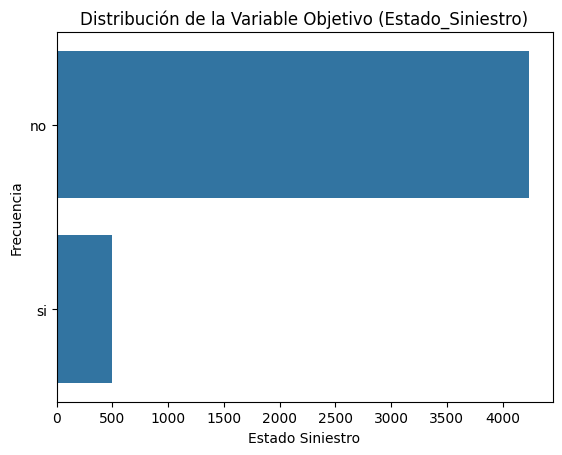

In [144]:
# Conteo de la variable target (Estado_Siniestro)
sns.countplot(df['Estado_Siniestro'])
plt.title('Distribución de la Variable Objetivo (Estado_Siniestro)')
plt.xlabel('Estado Siniestro')
plt.ylabel('Frecuencia')
plt.show()

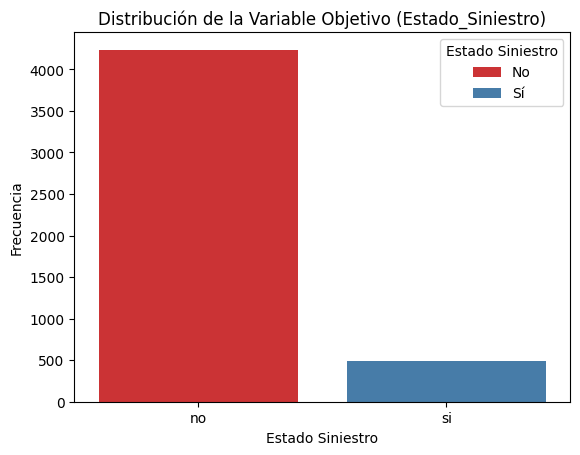

In [145]:
# Conteo de la variable target (Estado_Siniestro)
sns.countplot(data=df, x='Estado_Siniestro', hue='Estado_Siniestro', palette='Set1')
plt.title('Distribución de la Variable Objetivo (Estado_Siniestro)')
plt.xlabel('Estado Siniestro')
plt.ylabel('Frecuencia')
plt.legend(title='Estado Siniestro', labels=['No', 'Sí'])
plt.show()

Distribución de las Variables Numéricas:

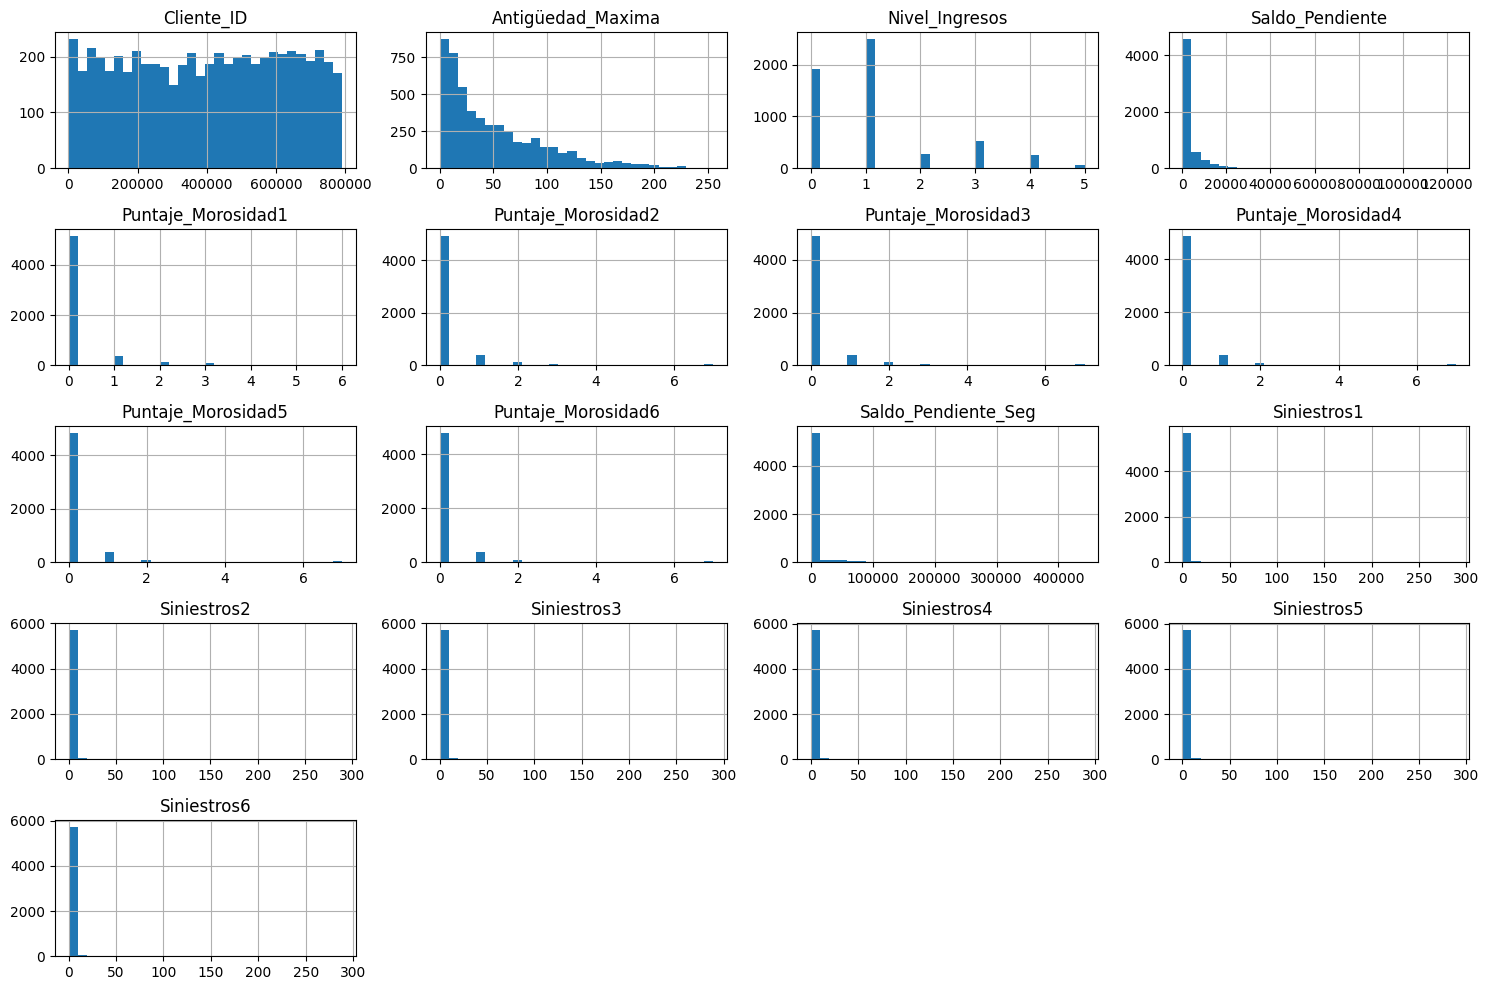

In [57]:
# Histograma de variables numéricas
df.hist(bins=30, figsize=(15,10), layout=(5,4))
plt.tight_layout()
plt.show()

Correlación entre las variables:

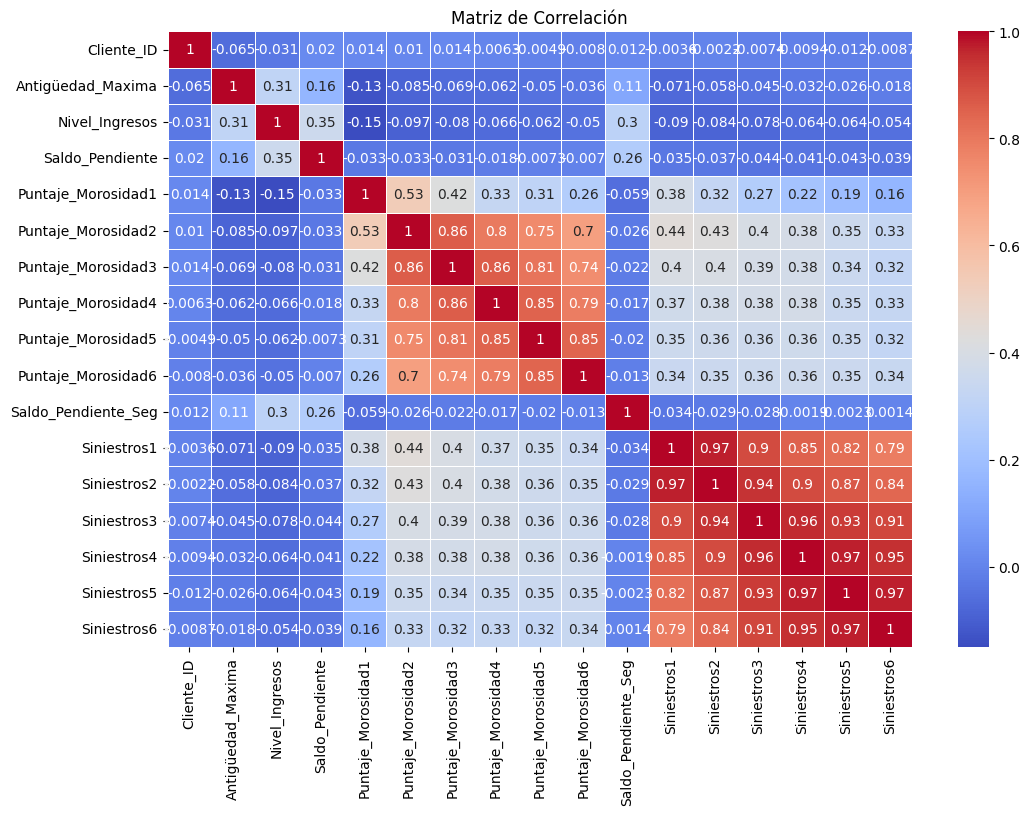

In [146]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Creación de nuevas variables**

In [147]:
# 1. Creación de nuevas variables basadas en el historial de siniestros
df['Total_Siniestros'] = df[['Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6']].sum(axis=1)
df

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro,Total_Siniestros
0,185,44.000000,1.000000,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no,0
1,238,79.000000,1.000000,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no,0
2,346,102.000000,1.000000,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no,0
3,460,54.984235,1.000000,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no,0
4,549,109.000000,1.161075,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,789119,7.000000,3.000000,12002.39,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no,0
4728,789320,54.984235,1.000000,739.67,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no,0
4729,789789,21.000000,0.000000,300.85,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,si,3
4730,790095,25.000000,1.000000,3218.91,3,7.0,7.0,7.0,7.0,7.0,0.0,4,3,3,4,2,2,si,18


In [163]:
#2. Creación de nuevas variables basadas en los puntajes de morosidad
df['Puntaje_Morosidad'] = df[['Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6']].sum(axis=1)
df

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,...,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro,Total_Siniestros,Suma_Puntajes_Morosidad,Proporcion_Saldo_Ingreso,Puntajes_Morosidad,Puntaje_Morosidad
0,185,44.000000,1.000000,604.86,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,no,0,0.0,604.860000,0.0,0.0
1,238,79.000000,1.000000,1006.21,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,no,0,0.0,1006.210000,0.0,0.0
2,346,102.000000,1.000000,299.23,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,no,0,0.0,299.230000,0.0,0.0
3,460,54.984235,1.000000,645.19,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,no,0,0.0,645.190000,0.0,0.0
4,549,109.000000,1.161075,218.00,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,no,0,0.0,187.756984,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,789119,7.000000,3.000000,12002.39,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,no,0,0.0,4000.796667,0.0,0.0
4728,789320,54.984235,1.000000,739.67,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,no,0,0.0,739.670000,0.0,0.0
4729,789789,21.000000,0.000000,300.85,NaN,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,si,3,0.0,inf,0.0,0.0
4730,790095,25.000000,1.000000,3218.91,NaN,7.0,7.0,7.0,7.0,7.0,...,3,4,2,2,si,18,38.0,3218.910000,35.0,35.0


In [149]:
#3. Creación de nuevas variables basadas en el saldo pendiente
df['Proporcion_Saldo_Ingreso'] = df['Saldo_Pendiente'] / df['Nivel_Ingresos']
df

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,...,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro,Total_Siniestros,Suma_Puntajes_Morosidad,Proporcion_Saldo_Ingreso
0,185,44.000000,1.000000,604.86,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no,0,0.0,604.860000
1,238,79.000000,1.000000,1006.21,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no,0,0.0,1006.210000
2,346,102.000000,1.000000,299.23,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no,0,0.0,299.230000
3,460,54.984235,1.000000,645.19,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no,0,0.0,645.190000
4,549,109.000000,1.161075,218.00,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no,0,0.0,187.756984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,789119,7.000000,3.000000,12002.39,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no,0,0.0,4000.796667
4728,789320,54.984235,1.000000,739.67,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no,0,0.0,739.670000
4729,789789,21.000000,0.000000,300.85,0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,0,si,3,0.0,inf
4730,790095,25.000000,1.000000,3218.91,3,7.0,7.0,7.0,7.0,7.0,...,4,3,3,4,2,2,si,18,38.0,3218.910000


**Creacion de variables categoricas:**

En nuestro CASO, las variables del conjunto de datos son numéricas o binarias (como Estado_Siniestro, que ya está codificada como 0 o 1), por lo que no se necesita aplicar One-Hot Encoding u otra técnica de codificación categórica sobre esa variable.
Pero, si podemos aplicar a la variable: Puntaje_Morosidad1, ..., Puntaje_Morosidad6

In [165]:
print(df['Puntaje_Morosidad'].isna())

0       False
1       False
2       False
3       False
4       False
        ...  
4727    False
4728    False
4729    False
4730    False
4731    False
Name: Puntaje_Morosidad, Length: 4732, dtype: bool


In [167]:
# Definir los límites de los intervalos
bins = [-1, 0, 29, 59, 89, 119, 149, 179]

# Definir las etiquetas para cada intervalo
labels = ['No Dq', '1-29', '30-59', '60-89', '90-119', '120-149', '150-179']

# Aplicar la clasificación a la columna Puntaje_Morosidad
df['Puntaje_Morosidad_clasificado'] = pd.cut(df['Puntaje_Morosidad'], bins=bins, labels=labels)

# Mostrar el resultado
print(df[['Puntaje_Morosidad', 'Puntaje_Morosidad_clasificado']].head(1000))





    Puntaje_Morosidad Puntaje_Morosidad_clasificado
0                 0.0                         No Dq
1                 0.0                         No Dq
2                 0.0                         No Dq
3                 0.0                         No Dq
4                 0.0                         No Dq
..                ...                           ...
995               9.0                          1-29
996               0.0                         No Dq
997               0.0                         No Dq
998               0.0                         No Dq
999               7.0                          1-29

[1000 rows x 2 columns]


**6. Segmentación de Clientes**

Creación de Segmentos:

In [63]:
# Crear una copia del DataFrame para evitar SettingWithCopyWarning
# SettingWithCopyWarning : indica que puede haber problemas con la asignación de nuevos valores en una vista del DataFrame original
data_copy = df.copy()

# Obtener el valor máximo de Antigüedad_Maxima en los datos
max_value = data_copy['Antigüedad_Maxima'].max()

# Crear segmentos basados en la Antigüedad_Maxima
data_copy['segmento_antiguedad'] = pd.cut(data_copy['Antigüedad_Maxima'], bins=[0, 10, 20, 30, 40, 50, 60, 70, max_value + 1], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60','60-70','70+'], include_lowest=True)

# Crear segmentos basados en el Nivel_Ingresos y manejar duplicados
# Utilizamos rank(method='first') para evitar valores duplicados en los bordes de los intervalos al crear los cuantiles.
data_copy['segmento_ingresos'] = pd.qcut(data_copy['Nivel_Ingresos'].rank(method='first'), q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Mostrar la distribución de segmentos: Esto muestra las primeras filas del DataFrame con las nuevas columnas de segmentos.
print(data_copy[['segmento_antiguedad', 'segmento_ingresos']].head(100))

   segmento_antiguedad segmento_ingresos
0                40-50        Medio-Bajo
1                  70+        Medio-Bajo
2                  70+        Medio-Bajo
3                50-60        Medio-Bajo
4                  70+        Medio-Alto
..                 ...               ...
95                0-10              Bajo
96               20-30        Medio-Bajo
97               20-30        Medio-Bajo
98               60-70        Medio-Bajo
99                 70+        Medio-Bajo

[100 rows x 2 columns]


In [64]:
# Distribución de segmentos por antigüedad
print(data_copy['segmento_antiguedad'].value_counts())

segmento_antiguedad
70+      1286
50-60     771
10-20     684
0-10      619
20-30     456
30-40     363
40-50     319
60-70     234
Name: count, dtype: int64


In [65]:
# Distribución de segmentos por ingresos
print(data_copy['segmento_ingresos'].value_counts())

segmento_ingresos
Bajo          1183
Medio-Bajo    1183
Medio-Alto    1183
Alto          1183
Name: count, dtype: int64


**7. MODELADO: Desarrollo del Modelo**

**División del Conjunto de Datos:**

Para dividir tu conjunto de datos en conjuntos de entrenamiento y prueba, vamos a utilizar la función train_test_split de la biblioteca scikit-learn. Este paso es importante para evaluar el rendimiento del modelo en datos no vistos durante la etapa de entrenamiento,

In [66]:
from sklearn.model_selection import train_test_split
# Usamos train_test_split para dividir los datos en conjuntos de entrenamiento y prueba

# Suponiendo que data_copy es el DataFrame limpio y segmentado
# Definir las características (X) y la variable objetivo (y)
X = data_copy.drop('Estado_Siniestro', axis=1) #X son las características del modelo, es decir, todas las columnas excepto Estado_Siniestro.
y = data_copy['Estado_Siniestro'] # y es la variable objetivo, en este caso, Estado_Siniestro.

# División del conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 indica que el 20% de los datos se utilizarán para pruebas y el 80% para entrenamiento.
# random_state=42 asegura que la división sea reproducible. Cambiar este valor generará diferentes divisiones.

# Este reparto (80% para entrenamiento y 20% para prueba) asegura que el modelo tenga suficiente datos para aprender durante el entrenamiento y que haya suficientes datos
# separados para evaluar el rendimiento del modelo de manera objetiva.

In [67]:
# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
# X_train.shape y X_test.shape muestran las dimensiones de los conjuntos de entrenamiento y prueba respectivamente.
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (3785, 19)
Tamaño del conjunto de prueba: (947, 19)


***Explicación de reusltado:***
* conjunto de entrenamiento:

3785: Este número indica la cantidad de filas en el conjunto de entrenamiento, es decir, hay 3785 ejemplos (instancias) en el conjunto de entrenamiento.

19: Este número indica la cantidad de columnas (características) en el conjunto de entrenamiento. Cada ejemplo tiene 19 características.

* conjunto de prueba:

947: Este número indica la cantidad de filas en el conjunto de prueba, es decir, hay 947 ejemplos (instancias) en el conjunto de prueba.

19: Este número indica la cantidad de columnas (características) en el conjunto de prueba. Cada ejemplo tiene 19 características.

**Desarrollo del Modelo:**

Ahora que los datos están divididos en conjuntos de entrenamiento y prueba, el siguiente paso es desarrollar y entrenar el modelo. Aquí te dejo un ejemplo de cómo hacerlo utilizando un modelo de clasificación, como un RandomForestClassifier:

**Entrenamiento del Modelo:**

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identificar las características (columnas) categóricas y numéricas
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['number']).columns

# Crear el preprocesador de columnas
# Se crea un ColumnTransformer llamado preprocessor que aplica SimpleImputer a las columnas numéricas y OneHotEncoder a las columnas categóricas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Crear el pipeline con preprocesamiento y modelo
# Se crea un Pipeline que primero aplica el preprocessor y luego entrena un RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Verificar qué características categóricas tienen valores de cadena después de la transformación
print(X_train[categorical_features].head())

Empty DataFrame
Columns: []
Index: [1666, 4616, 3915, 2600, 1743]


* Luego, procedemos al Entrenamiento y Predicción:

In [92]:
# Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = pipeline.predict(X_test)



* Luego, evaluacion del modelo:

Se calculan y se imprimen las métricas de evaluación: matriz de confusión, informe de clasificación y exactitud del modelo.

In [93]:
# Evaluación del modelo
print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred))

print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

print('Exactitud del modelo:', accuracy_score(y_test, y_pred))

Matriz de Confusión:
[[832  11]
 [ 55  49]]
Informe de Clasificación:
              precision    recall  f1-score   support

          no       0.94      0.99      0.96       843
          si       0.82      0.47      0.60       104

    accuracy                           0.93       947
   macro avg       0.88      0.73      0.78       947
weighted avg       0.92      0.93      0.92       947

Exactitud del modelo: 0.9303062302006336


**Explicación:**
La matriz de confusión es una herramienta que permite visualizar el desempeño de un algoritmo de clasificación. Cada fila de la matriz representa las instancias en una clase predicha, mientras que cada columna representa las instancias en una clase real (o viceversa, dependiendo de la implementación).

En el contexto de la matriz de confusión proporcionada:

*Verdaderos Positivos (TP):* 832 casos en los que se predijo correctamente que el estado del siniestro es "no" cuando en realidad es "no".

*Falsos Negativos (FN):* 11 casos en los que se predijo incorrectamente que el estado del siniestro es "no" cuando en realidad es "sí".

*Falsos Positivos (FP):* 55 casos en los que se predijo incorrectamente que el estado del siniestro es "sí" cuando en realidad es "no".

*Verdaderos Negativos (TN):* 49 casos en los que se predijo correctamente que el estado del siniestro es "sí" cuando en realidad es "sí".


El informe de clasificación proporciona una evaluación más detallada del desempeño del modelo.

Significado de cada métrica:

*Precisión (precision):* La proporción de predicciones positivas correctas (TP) sobre el total de predicciones positivas (TP + FP). Es decir, de todas las predicciones positivas hechas por el modelo, ¿cuántas son realmente correctas?

*Recuperación (recall):* La proporción de instancias positivas que se identificaron correctamente (TP) sobre el total de instancias positivas (TP + FN). Es decir, de todas las instancias positivas reales, ¿cuántas se identificaron correctamente?

*F1-score:* La media armónica de precisión y recuperación. Es útil cuando hay un desequilibrio entre las clases.

*Soporte (support):* El número real de ocurrencias de la clase en el conjunto de datos.

*Exactitud (accuracy):* La proporción de predicciones correctas (TP + TN) sobre el total de predicciones (TP + TN + FP + FN). Es decir, de todas las predicciones realizadas por el modelo, ¿cuántas son correctas?



En este caso, el modelo tiene una precisión del 94% para la clase "no" y del 82% para la clase "sí". Sin embargo, el recall es del 99% para la clase "no" y del 47% para la clase "sí". Esto sugiere que el modelo es muy preciso para predecir "no", pero no tan bueno para predecir "sí", ya que deja pasar muchos casos positivos reales (FN). La exactitud general del modelo es del 93%.

**8. EVALUACION: Interpretación, Conclusiones y Recomendaciones**

Importancia de Variables:

In [112]:
# Obtener el modelo del pipeline (en este caso, el último paso es el clasificador RandomForest)
model = pipeline.steps[-1][1]

# Obtener la importancia de las características
importances = model.feature_importances_
importances

array([0.12905187, 0.10196541, 0.02767872, 0.12688846, 0.1414168 ,
       0.0887798 , 0.05521018, 0.03426944, 0.02418978, 0.01895106,
       0.00659141, 0.09068186, 0.05503103, 0.03975918, 0.02191349,
       0.01919248, 0.01842903])

In [99]:
print("Longitud de X_train:", len(X_train))
print("Longitud de y_train:", len(y_train))


Longitud de X_train: 3785
Longitud de y_train: 3785


In [100]:
print("Longitud de X_test:", len(X_test))
print("Longitud de y_test:", len(y_test))


Longitud de X_test: 947
Longitud de y_test: 947


In [104]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)


Tamaño de X_train: (3785, 19)
Tamaño de y_train: (3785,)


In [110]:
print("Tamaño de Importances:", len(importances))

Tamaño de Importances: 17


In [117]:
# Validar la longitud de las características y las importancias
if len(X_train.columns) != len(importances):
    # Calcular la diferencia en longitud
    diff_len = len(X_train.columns) - len(importances)

    # Extender importances con ceros para que tengan la misma longitud
    importances = list(importances) + [0] * diff_len
    print("La longitud de importances se ha ajustado.")

# Construir el DataFrame feature_importance_df
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})


In [118]:
# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [119]:
# Mostrar el DataFrame
print(feature_importance_df)

                Feature  Importance
4    Puntaje_Morosidad1    0.141417
0            Cliente_ID    0.129052
3       Saldo_Pendiente    0.126888
1     Antigüedad_Maxima    0.101965
11          Siniestros1    0.090682
5    Puntaje_Morosidad2    0.088780
6    Puntaje_Morosidad3    0.055210
12          Siniestros2    0.055031
13          Siniestros3    0.039759
7    Puntaje_Morosidad4    0.034269
2        Nivel_Ingresos    0.027679
8    Puntaje_Morosidad5    0.024190
14          Siniestros4    0.021913
15          Siniestros5    0.019192
9    Puntaje_Morosidad6    0.018951
16          Siniestros6    0.018429
10  Saldo_Pendiente_Seg    0.006591
17  segmento_antiguedad    0.000000
18    segmento_ingresos    0.000000


**INTERPRETACION DE RESULTADOS:**

***Cliente_ID:***

Esta variable representa el identificador único de cada cliente. Aunque tiene cierta importancia en el modelo (12.91%), su relevancia podría ser más bien indirecta. Por ejemplo, si hay patrones en el comportamiento de los clientes que están correlacionados con su identificador, el modelo podría capturar estos patrones.


***Antigüedad_Maxima:***

Esta característica refleja la antigüedad máxima de los clientes en la base de datos. Su importancia del 10.20% sugiere que la longevidad de un cliente puede estar relacionada con su propensión a presentar ciertos comportamientos, como siniestros o pagos atrasados.


***Nivel_Ingresos:***

Representa el nivel de ingresos de los clientes. Aunque su importancia es relativamente baja (2.77%), aún puede ser un factor relevante en la capacidad de un cliente para cumplir con sus obligaciones financieras.

***Saldo_Pendiente:***

Esta variable indica el saldo pendiente en las cuentas de los clientes. Su importancia del 12.69% sugiere que la cantidad de deuda que un cliente tiene puede ser un indicador importante de su riesgo crediticio o de su propensión a presentar siniestros.

***Puntaje_Morosidad1, Puntaje_Morosidad2, Puntaje_Morosidad3, Puntaje_Morosidad4, Puntaje_Morosidad5 y Puntaje_Morosidad6:***

Estos puntajes de morosidad representan evaluaciones del historial crediticio de los clientes en diferentes momentos. Tienen una importancia significativa en el modelo, con valores que oscilan entre el 1.89% y el 14.14%. Esto indica que el comportamiento pasado de los clientes en términos de cumplimiento de pagos es un predictor clave de su comportamiento futuro.

***Saldo_Pendiente_Seg:***

Esta variable representa el saldo pendiente segmentado. Aunque su importancia es baja (0.66%), aún puede proporcionar información adicional sobre los hábitos de gasto y pago de los clientes en diferentes segmentos de tiempo.

***Siniestros1, Siniestros2, Siniestros3, Siniestros4, Siniestros5 y Siniestros6: ***

Estas variables indican el número de siniestros que experimentaron los clientes en diferentes periodos. Tienen importancias que varían entre el 1.84% y el 9.07%. Un mayor número de siniestros puede indicar un mayor riesgo para la compañía de seguros.

***segmento_antiguedad y segmento_ingresos:***

Aunque estas variables tienen una importancia de cero en el modelo, aún pueden tener valor descriptivo. Su falta de importancia sugiere que no contribuyen significativamente a las predicciones del modelo, pero aún así pueden proporcionar información sobre la distribución de los datos en diferentes segmentos de la población.

**En resumen**, el análisis detallado de la importancia de cada variable proporciona información valiosa sobre los factores que influyen en las predicciones del modelo y cómo estas características están relacionadas con el resultado objetivo, en este caso, la probabilidad de presentar un siniestro.

**CONCLUSIONES:**

*Importancia de las características:*

El análisis de importancia de las características revela que los puntajes de morosidad, el saldo pendiente y la antigüedad máxima son los predictores más importantes para determinar la probabilidad de presentar un siniestro en nuestra base de datos.

*Histórico de siniestros:*

La cantidad de siniestros anteriores también juega un papel crucial en las predicciones del modelo. Los clientes con un historial de siniestros tienden a tener una mayor probabilidad de presentar nuevos siniestros en el futuro.

*Segmentación y diversificación:*

Aunque las características relacionadas con la segmentación por antigüedad e ingresos no tuvieron una importancia significativa en el modelo, aún así proporcionan información valiosa sobre la distribución de los datos en diferentes segmentos de la población. Esto sugiere la importancia de comprender la diversidad dentro de la base de clientes y adaptar las estrategias en consecuencia.

**RECOMENDADIONES**

*Enfoque en el historial crediticio:*

Dado que los puntajes de morosidad tienen una importancia significativa en el modelo, se recomienda enfocarse en el seguimiento y análisis continuo del historial crediticio de los clientes. Esto puede incluir la implementación de sistemas de alerta temprana para identificar a los clientes con un mayor riesgo de incumplimiento.

*Estrategias de retención y fidelización:*

Dado que la antigüedad máxima de un cliente también es un predictor importante, se recomienda desarrollar estrategias específicas de retención y fidelización para clientes de larga data. Esto puede incluir programas de recompensas, beneficios exclusivos y servicios personalizados para incentivar la lealtad del cliente.

*Seguimiento proactivo de siniestros:*

Dado que el historial de siniestros es un predictor clave de futuros siniestros, se recomienda implementar sistemas de seguimiento proactivo para identificar y abordar las necesidades de los clientes que han experimentado siniestros en el pasado. Esto puede incluir servicios de atención al cliente mejorados, asesoramiento personalizado y programas de gestión de riesgos.